# Unsupervised Machine Learning

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Label Data
df = pd.read_csv("IRIS.csv")
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [6]:
# Unlabeled Dataset
df.drop(columns='species', inplace = True)
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


## Clustering
Grouping
## Association
Lays with coke

**Below is the list of some popular unsupervised learning algorithms**
- K-means clustering
- Hierarchal clustering
- DBSCAN clustering
- Apriori algorithm
- Principle component analysis

# K-means Clustering
**Google Photos** explore all people are clustered 
# K-means clustering Practical

In [7]:
dataset = pd.read_csv("IRIS.csv")
dataset.drop(columns = 'species', inplace = True)
dataset.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


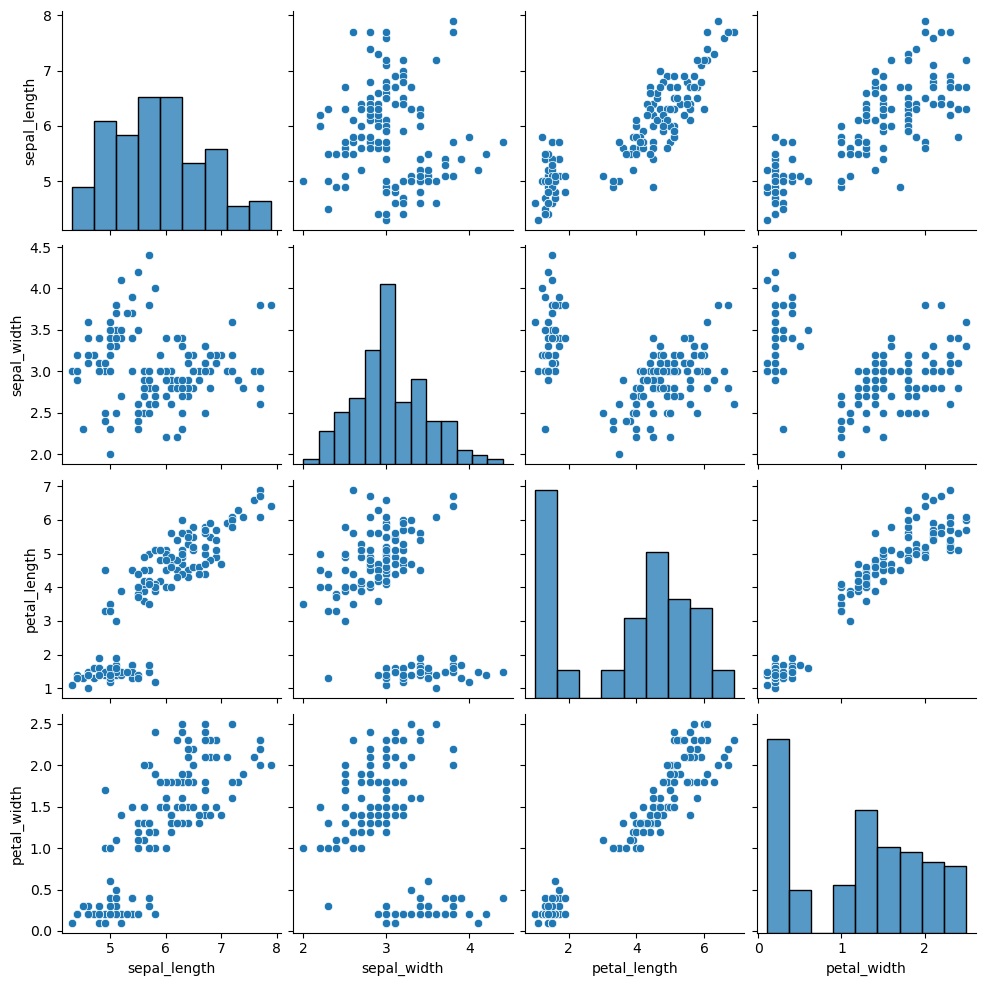

In [10]:
sns.pairplot(data=dataset)
plt.show()

In [11]:
# since three clusters are available 

In [12]:
from sklearn.cluster import KMeans

In [13]:
wcss = []

for i in range(2, 21):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(dataset)
    wcss.append(km.inertia_)

E:\Anaconda Installed\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda Installed\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda Installed\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda Installed\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

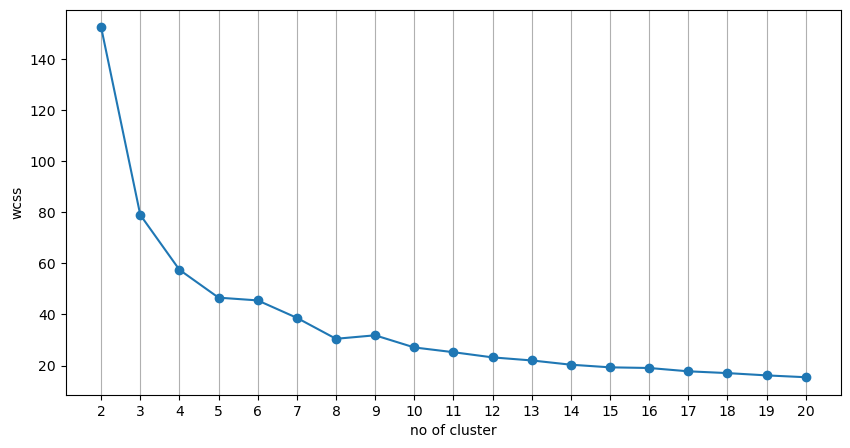

In [18]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(2, 21)], wcss, marker='o')
plt.xlabel('no of cluster')
plt.xticks([i for i in range(2, 21)])
plt.grid(axis = 'x')
plt.ylabel('wcss')
plt.show()

In [28]:
kmn = KMeans(n_clusters=3)
dataset['predict']=kmn.fit_predict(dataset)
dataset.head()

E:\Anaconda Installed\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,predict,Predict
0,5.1,3.5,1.4,0.2,2,0
1,4.9,3.0,1.4,0.2,2,0
2,4.7,3.2,1.3,0.2,2,0
3,4.6,3.1,1.5,0.2,2,0
4,5.0,3.6,1.4,0.2,2,0


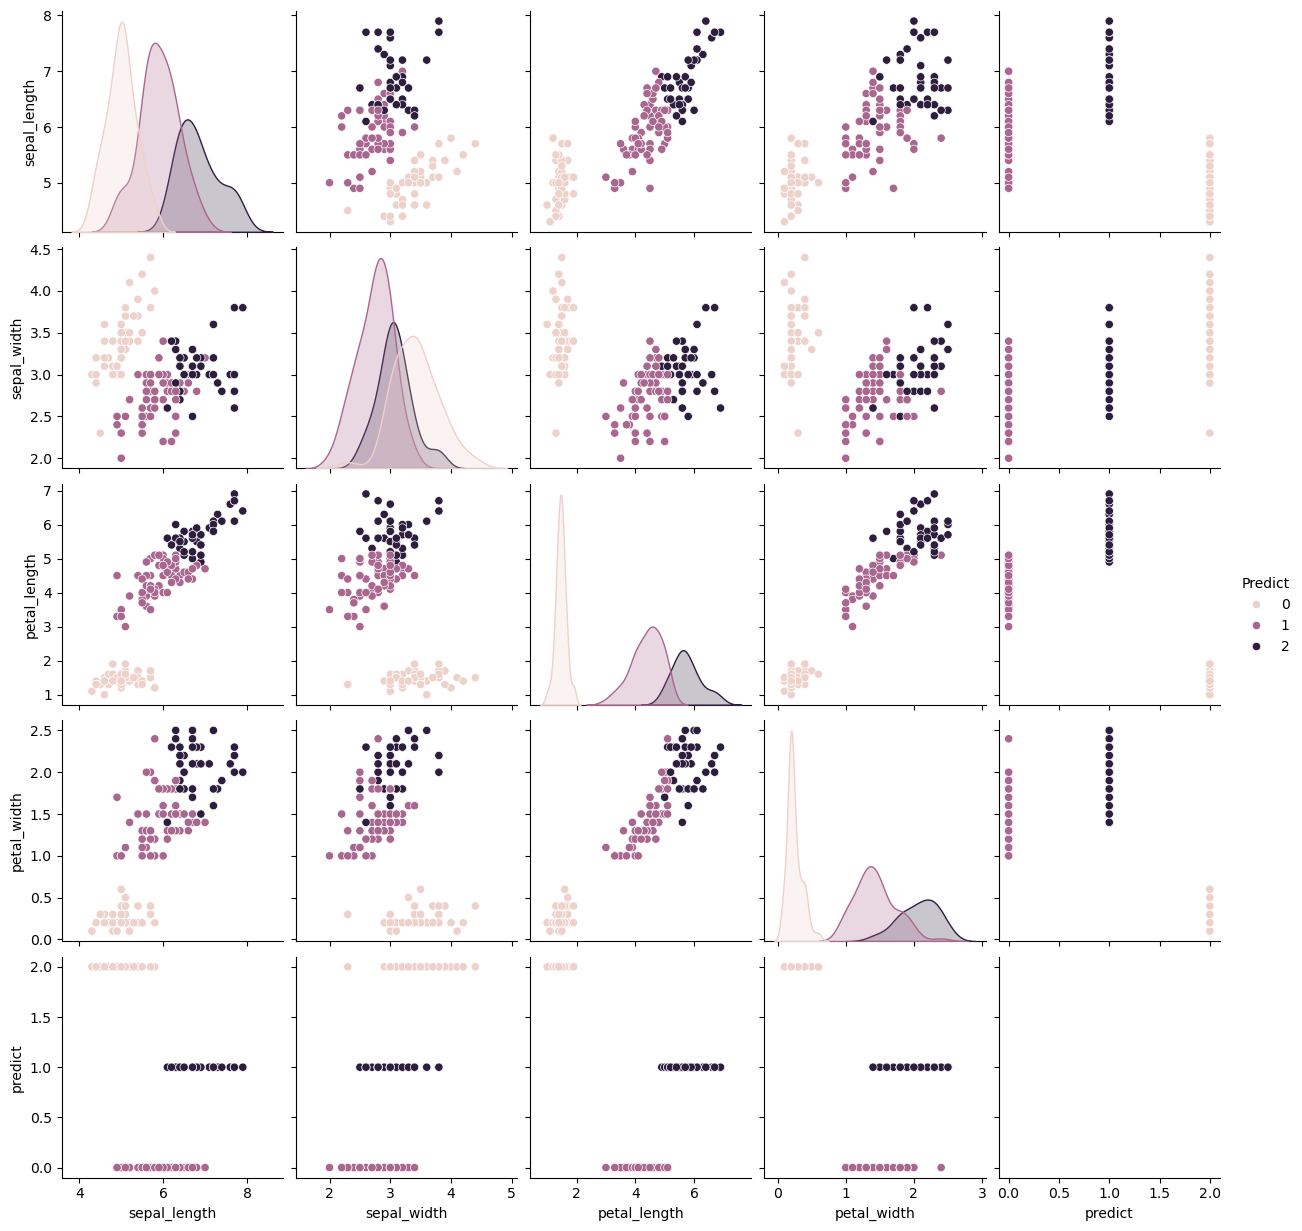

In [29]:
sns.pairplot(data=dataset, hue='Predict')
plt.show()

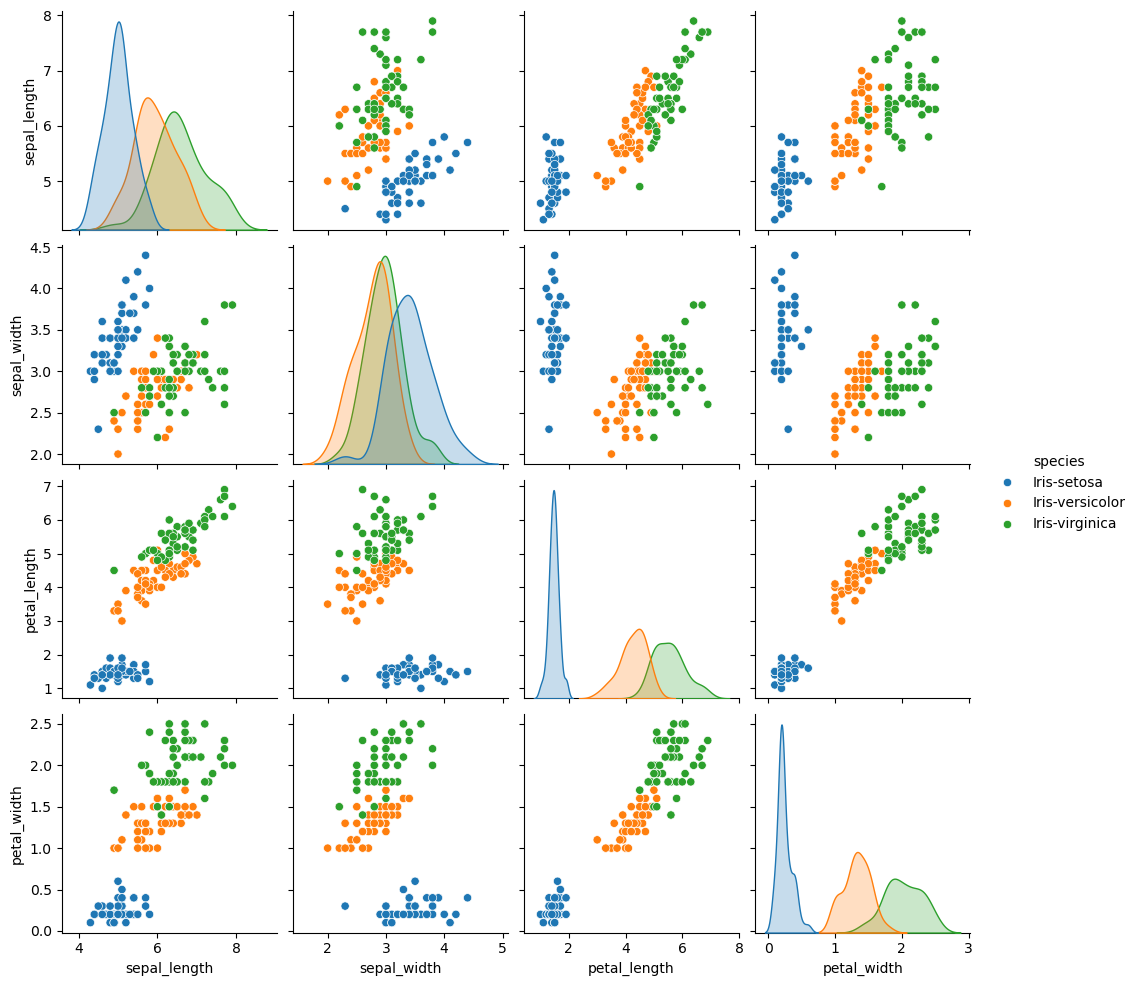

In [30]:
dataset = pd.read_csv('IRIS.csv')
sns.pairplot(data=dataset, hue='species')
plt.show()

# Herarchical Clustering
## Agglomerative Herarchical Clustering
## Divisive Herarchical Clustering 

In [31]:
dataset = pd.read_csv('IRIS.csv')
dataset.drop(columns='species', inplace=True)
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
# Dendogram
import scipy.cluster.hierarchy as sc

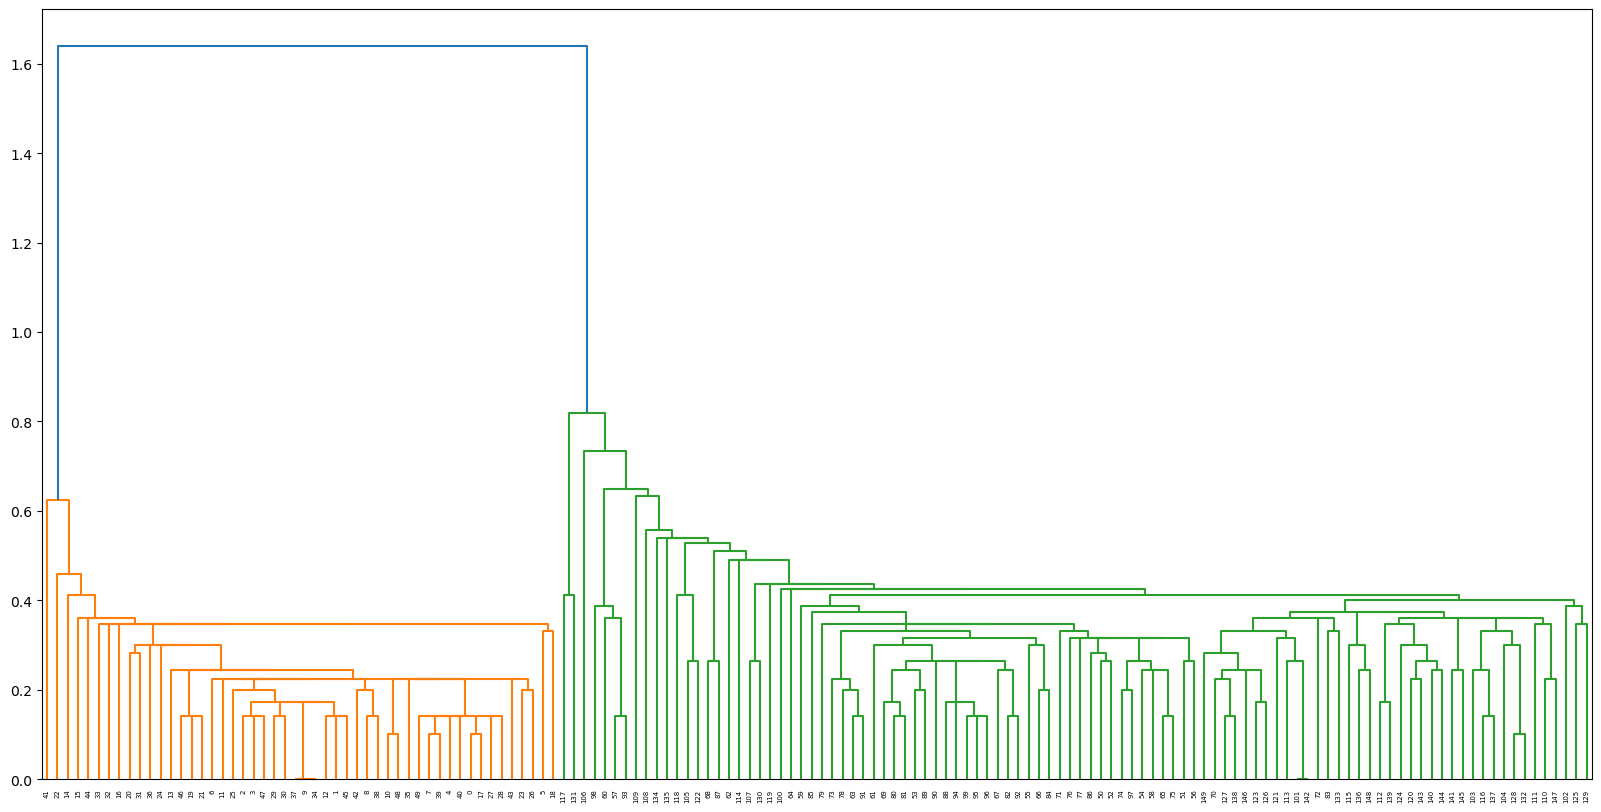

In [35]:
plt.figure(figsize=(20,10))
sc.dendrogram(sc.linkage(dataset, method='single', metric='euclidean'))
plt.show()

In [36]:
from sklearn.cluster import AgglomerativeClustering

In [38]:
ac = AgglomerativeClustering(n_clusters=2, linkage='single')
dataset['Predict']=ac.fit_predict(dataset)

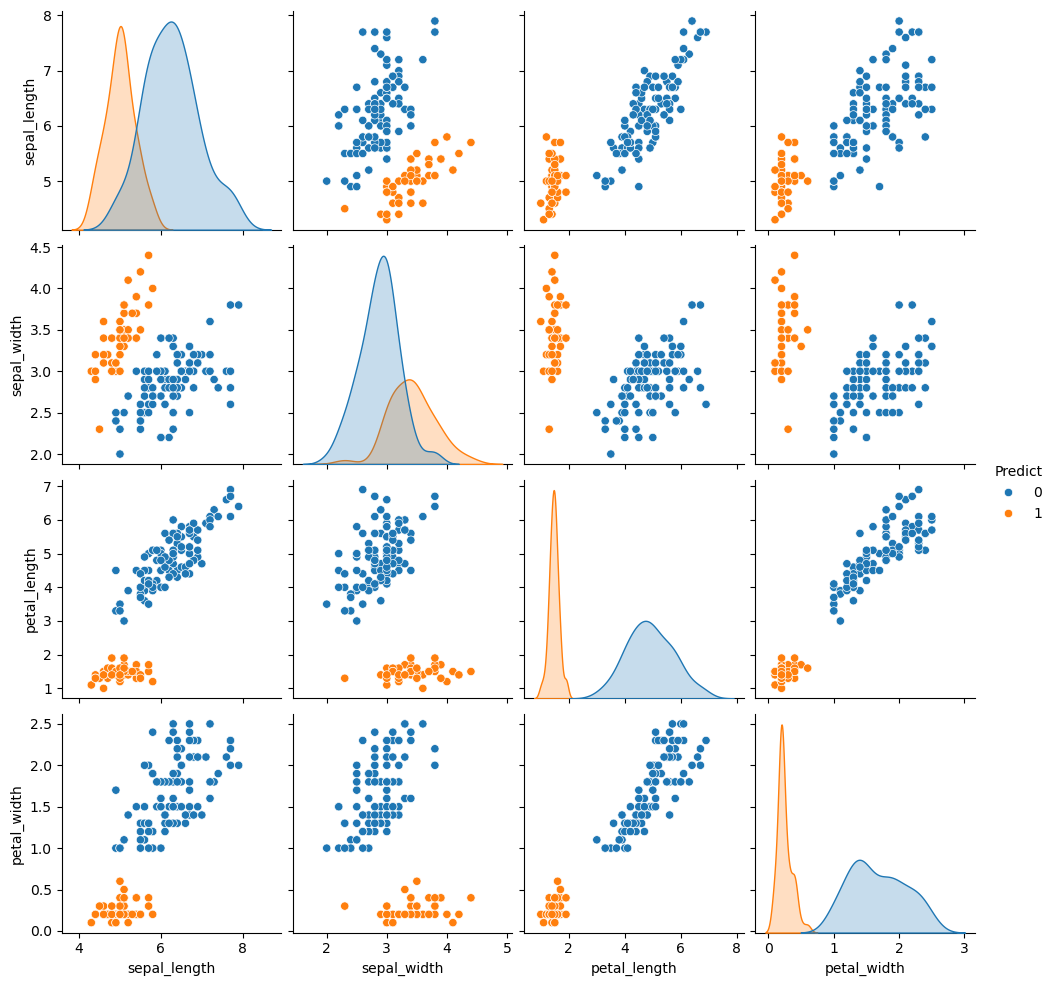

In [39]:
sns.pairplot(data=dataset, hue='Predict')
plt.show()

# DBSCAN Clustering Algorithm
Density based clusters

In [40]:
from sklearn.datasets import make_moons

In [41]:
x, y = make_moons(n_samples=250, noise=0.05)

In [46]:
df = {'data1':x[:, 0], 'data2':x[:, 1]}

In [47]:
dataset=pd.DataFrame(df)
dataset.head(3)

,data1,data2
0,-0.922370,0.062626
1,-0.802253,0.660925
2,-0.359690,0.947382


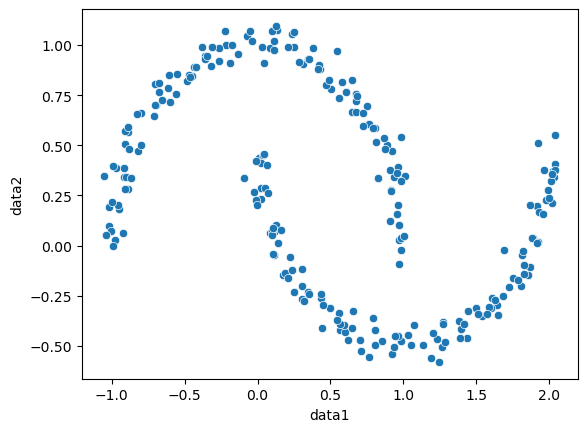

In [48]:
sns.scatterplot(x='data1', y='data2', data=dataset)
plt.show()

In [49]:
from sklearn.cluster import DBSCAN

In [50]:
db = DBSCAN(eps=0.2, min_samples=5)

In [51]:
dataset['predict'] = db.fit_predict(dataset)
dataset.head()

,data1,data2,predict
0,-0.922370,0.062626,0
1,-0.802253,0.660925,0
2,-0.359690,0.947382,0
3,0.565179,-0.420840,1
4,0.981509,-0.477945,1


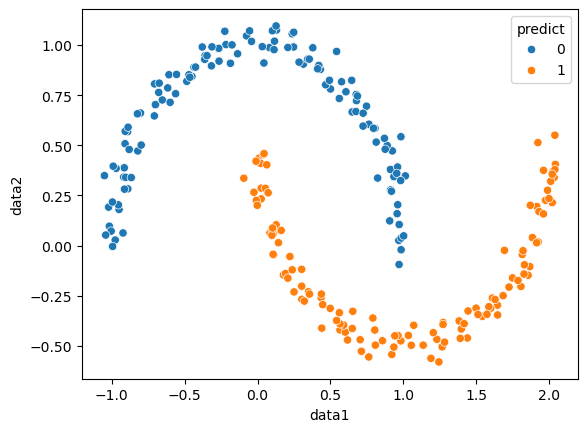

In [52]:
sns.scatterplot(x='data1', y='data2', hue='predict', data=dataset)
plt.show()

# Silhouette Score